In [1]:
import json
import pandas as pd
import os

# Yelp Dataset (https://www.kaggle.com/yelp-dataset/yelp-dataset)

In [2]:
#Subset the number of lines (e.g. reading first 30,000 lines here)
N = 30000
#Replace the file location here if you are running it on your machine
with open('D:/Machine Learning/YelpFull/yelp_academic_dataset_business.json', 'rb') as datafile:
    dataSubset = [next(datafile) for x in range(N)]

# Examining the data

In [3]:
parsed = json.loads(dataSubset[0]) #[0] gives the first element
print(json.dumps(parsed, indent=4, sort_keys=True))
processedData = "[" + ','.join([d.strip().decode('UTF-8') for d in dataSubset]) + "]"

{
    "address": "2818 E Camino Acequia Drive",
    "attributes": {
        "GoodForKids": "False"
    },
    "business_id": "1SWheh84yJXfytovILXOAQ",
    "categories": "Golf, Active Life",
    "city": "Phoenix",
    "hours": null,
    "is_open": 0,
    "latitude": 33.5221425,
    "longitude": -112.0184807,
    "name": "Arizona Biltmore Golf Club",
    "postal_code": "85016",
    "review_count": 5,
    "stars": 3.0,
    "state": "AZ"
}


In [4]:
# now, load it into pandas (N number of rows)
dfData = pd.read_json(processedData)
dfData.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


## removing missing values

In [5]:
dfData = dfData.dropna(axis=0)

## Rating distribution across businesses

In [6]:
x=dfData["stars"].value_counts()
x=x.sort_index()
x.rename(columns={'stars':'value_counts'})
x.index.name= 'stars'

In [7]:
import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns

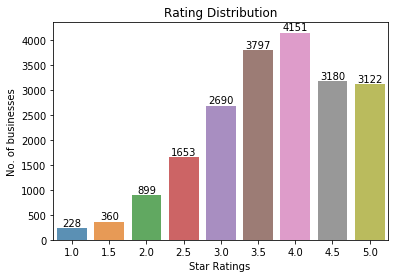

In [8]:
ax=sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Rating Distribution")
plt.ylabel('No. of businesses')
plt.xlabel('Star Ratings ')

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()


## Finding the most popular business categories

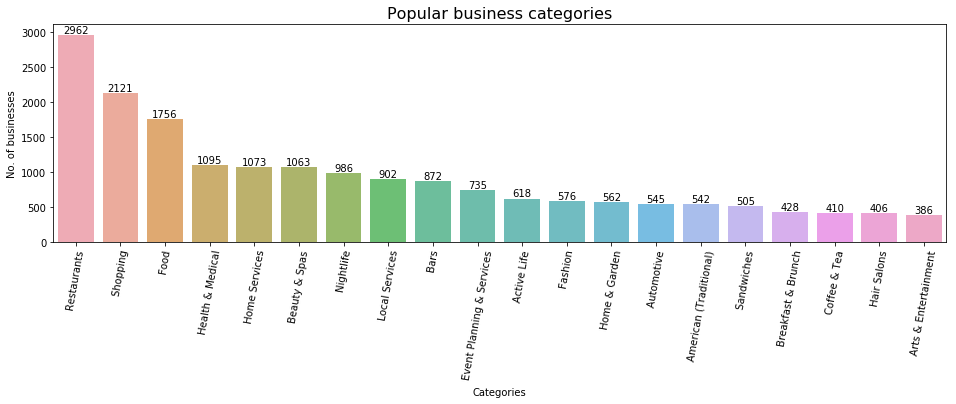

In [9]:
business_cats=' '.join(dfData['categories'])

cats=pd.DataFrame(business_cats.split(','),columns=['category'])
a=cats.category.value_counts()
a=a.sort_values(ascending=False)
a=a.iloc[0:20]


plt.figure(figsize=(16,4))
aa = sns.barplot(a.index, a.values, alpha=0.8)
plt.title("Popular business categories",fontsize=16)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('No. of businesses')
plt.xlabel('Categories')

#adding the text labels
rects = aa.patches
labels = a.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    aa.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

plt.show()


## Let's plot the businesses in the dataset on a map

In [10]:
import folium
usa_biz = folium.Map(location=[35.2271,-80.8431],zoom_start=10)

In [11]:
biz = folium.map.FeatureGroup()
lats=dfData['latitude'].tolist()
longs=dfData['longitude'].tolist()
names=dfData['name'].tolist()
for i in range(1000):
    biz.add_child(folium.CircleMarker([lats[i],longs[i]], tiles='OpenStreetMap', radius =4, color="red", fill_color="Red"))
    folium.Marker([lats[i],longs[i]],popup=names[i]).add_to(usa_biz)

In [12]:
usa_biz.add_child(biz)
usa_biz

##  Plotting just the salons on the map

In [13]:
dfSalons=dfData[dfData['categories'].str.contains('Salons',regex=False)]

In [14]:
usa_map = folium.Map(location=[35.2271,-80.8431],zoom_start=4)
usa = folium.map.FeatureGroup()
lats=dfSalons['latitude'].tolist()
longs=dfSalons['longitude'].tolist()
#names1=dfSalons['name'].tolist()

#rests=dfRestaurants['categories'].tolist()
Salons=dfSalons['categories'].tolist()
names1=dfSalons['name'].tolist()

for i in range(1000):
    #if 'Restaurants' in rests[i]:
        usa.add_child(folium.CircleMarker([lats[i],longs[i]], tiles='OpenStreetMap', radius =4, color="red", fill_color="Red"))
        #folium.Marker([lats[i],longs[i]],popup=names1[i]).add_to(usa_map)
        folium.Marker([lats[i],longs[i]], popup=names1[i]).add_to(usa_map)
usa_map.add_child(usa)
usa_map

## Finding density of businesses using heatmap

In [15]:
import numpy as np
from folium import plugins
from folium.plugins import HeatMap
hotness_map = folium.Map(location=[35.2271,-80.8431],tiles="OpenStreetMap",zoom_start=10)
hotness = folium.map.FeatureGroup()
lats = dfData['latitude'].tolist()
longs = dfData['longitude'].tolist()
data = dfData[['latitude','longitude']].values.tolist()
hm = plugins.HeatMap(data, radius = 20, min_opacity = 0.1, max_val = 100,gradient={.1: 'blue', .3: 'lime', .5: 'red'})
hm.add_to(hotness_map)
hotness_map

# Let's take it up a notch!
## I tried to come up with an insight to find most profitable restaurant categories 

In [16]:
dfRestaurants=dfData[dfData['attributes'].str.contains('RestaurantsPriceRange2',regex=False)]
dfRestaurants=dfRestaurants[dfRestaurants['categories'].str.contains('Restaurants',regex=False)]

In [17]:
business_cats=' '.join(dfRestaurants['categories'])
cats=pd.DataFrame(business_cats.split(','),columns=['category'])
a=cats.category.value_counts()
cats=cats[cats.isin(a.index[a>=20]).values]
z = cats['category'].unique()
z = np.delete(z,np.argwhere(z ==' Restaurants'))
z = np.delete(z,np.argwhere(z ==' Food'))

### Calculating popularity for each category by finding average number of reviews

In [18]:
data=[]
for category in z:
    priceCount=0
    totalCount=0
    revCount=0
    for index, row in dfRestaurants.iterrows():
        r=json.dumps(row['attributes'])
        rd=json.loads(r)
        if category in str(row['categories']) and rd['RestaurantsPriceRange2']!='None':
            priceCount+=int(rd['RestaurantsPriceRange2'])
            totalCount+=1
            revCount+=row['review_count']
    if(totalCount!=0):
        data.append([category,revCount/totalCount,priceCount/totalCount,totalCount])       

## Bubble chart for Avg Price vs Popularity (radius: total number of restaurants)

In [19]:
revDf=pd.DataFrame(data,columns=['Category','AvgReview','AvgPrice', 'TotalRest'])
import plotly.plotly as py
import cufflinks as cf
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
cf.set_config_file(offline=True, world_readable=True, theme='pearl')
revDf.iplot(kind='bubble', x='AvgReview', y='AvgPrice', size='TotalRest', text='TotalRest', categories='Category',
             xTitle='Popularity', yTitle='Average Price',
             filename='cufflinks/simple-bubble-chart')

### If you're planning to open up a restaurant, data suggests setting up a steakhouse or buying a restaurant space in a hotel will bring you more money. 
###### I'd personally go for a wine bar tho, high average price and quite popular. ~~Also, you can get drunk at work~~